# 凸2次計画問題

$$
 \begin{equation*}
    \begin{aligned}
        & \text{Minimize}
            & \frac{1}{2}\boldsymbol{x}^{T}Q\boldsymbol{x} + \boldsymbol{c}^{T}\boldsymbol{x} \\
        & \text{subject to}
            & A\boldsymbol{x}=\boldsymbol{b} \\
            && \boldsymbol{x} \geq \boldsymbol{0}
    \end{aligned}   
 \end{equation*}
$$

### 回帰分析と正則化
回帰分析も凸2次計画問題に帰着できる。

In [5]:
import cvxpy as cp
import numpy as np

r = 20
np.random.seed(1)

A = np.hstack((np.random.randn(r,1), np.ones([r,1])))
c = A[:,0]
b = (10.0*np.random.randn() * c) + \
        + (0.5*np.random.randn(r))

x = cp.Variable(2)

obj  = cp.Minimize( sum(cp.square(A@x-b)) )
P = cp.Problem(obj)
P.solve(verbose=True)
print(x.value)

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 402, constraints m = 400
          nnz(P) + nnz(A) = 1220
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   2.53e+01   3.88e+05   1.00e-01   3.83e-04s
  50   2.9533e+00   1.33e-06   5.23e-06   1.74e-03   1.13e-03s
plsh   2.9533e+00   5.39e-15   2.53e-13   --

/home/ao/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/ao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until


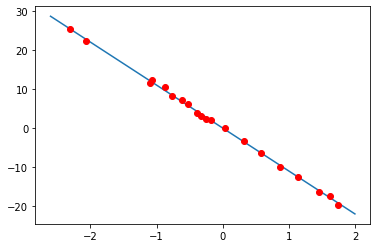

In [6]:
import matplotlib.pyplot as plt
s = np.arange(c.min()-0.3, c.max()+0.3, 0.1)
t = np.asscalar(x.value[0]) * s + np.asscalar(x.value[1])
plt.plot(s, t)
plt.plot(c.T, b, 'ro')
plt.show()

$l_2$ノルム正則化付き最小二乗法（LASSO）

$$
 \begin{equation*}
    \begin{aligned}
        & \text{Minimize}
            & \|A\boldsymbol{x}-\boldsymbol{b}\|^{2}_{2} + \gamma \|\boldsymbol{x}\|_{1} \\
    \end{aligned}
 \end{equation*}
$$

$z$を導入して、
$$
 \begin{equation*}
       \begin{aligned}
           & \text{Minimize}
               & \|A\boldsymbol{x}-\boldsymbol{b}\|^{2}_{2} + \gamma \boldsymbol{1}^{T}\boldsymbol{z} \\
           & \text{subject to}
               & \boldsymbol{z}&\geq \boldsymbol{x} \\
               && \boldsymbol{z} &\geq -\boldsymbol{x} \\
       \end{aligned}
   \end{equation*}
$$

In [9]:
import cvxpy as cp
import numpy as np
m, n, gam = 10, 5, 100.0
np.random.seed(2)
A    = np.random.randn(m,n)
b    = 100 * np.random.randn(m)
x, z = cp.Variable(n), cp.Variable(n)
obj  = cp.Minimize( sum(cp.square(A@x-b)) \
                    + (gam * sum(z)) )
cons = [z >=  x,
        z >= -x]
P = cp.Problem(obj, cons)
P.solve(verbose=True)
print(x.value)

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 110, constraints m = 110
          nnz(P) + nnz(A) = 630
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -4.0000e+03   1.86e+02   2.79e+07   1.00e-01   2.56e-04s
  50   4.9418e+04   6.76e-04   3.76e-04   3.03e-03   4.92e-04s
plsh   4.9418e+04   2.39e-14   2.98e-11   ---